<a href="https://colab.research.google.com/github/Alissssssa2003/Alissssssa2003/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%BA%D0%B0%D0%BA%D0%BE%D0%B5%20%D0%B0%D0%BD%D0%B8%D0%BC%D0%B5%20%D0%BF%D0%BE%D1%81%D0%BC%D0%BE%D1%82%D1%80%D0%B5%D1%82%D1%8C%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/anime.csv')
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


anime_id - myanimelist.net's unique id identifying an anime.
name - full name of anime.
genre - comma separated list of genres for this anime.
type - movie, TV, OVA, etc.
episodes - how many episodes in this show. (1 if movie).
rating - average rating out of 10 for this anime.
members - number of community members that are in this anime's
"group".

In [ ]:
df = df.drop(columns = ['name','genre','type'])
#Тут мы удалили все столбцы, которые нам не давали никакой нужной инфы
df


,anime_id,episodes,rating,members
0,32281,1,9.37,200630
1,5114,64,9.26,793665
2,28977,51,9.25,114262
3,9253,24,9.17,673572
4,9969,51,9.16,151266
...,...,...,...,...
12289,9316,1,4.15,211
12290,5543,1,4.28,183
12291,5621,4,4.88,219
12292,6133,1,4.98,175


In [ ]:
df.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [ ]:
df['rating'] = df['rating'].apply(lambda x: 'Низкий' if x<=5.0 else 'Средний' if x>5.0 and x<8.0 else 'Высокий' if x>=8.0 else x)

In [ ]:
df

,anime_id,episodes,rating,members
0,32281,1,Высокий,200630
1,5114,64,Высокий,793665
2,28977,51,Высокий,114262
3,9253,24,Высокий,673572
4,9969,51,Высокий,151266
...,...,...,...,...
12289,9316,1,Низкий,211
12290,5543,1,Низкий,183
12291,5621,4,Низкий,219
12292,6133,1,Низкий,175


In [ ]:
df['rating'] = df['rating']. fillna ('Низкий')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   anime_id  12294 non-null  int64 
 1   episodes  12294 non-null  object
 2   rating    12294 non-null  object
 3   members   12294 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 384.3+ KB


In [ ]:
df = df.dropna()
df
#Удалям наны

,anime_id,episodes,rating,members
0,32281,1,Высокий,200630
1,5114,64,Высокий,793665
2,28977,51,Высокий,114262
3,9253,24,Высокий,673572
4,9969,51,Высокий,151266
...,...,...,...,...
12289,9316,1,Низкий,211
12290,5543,1,Низкий,183
12291,5621,4,Низкий,219
12292,6133,1,Низкий,175


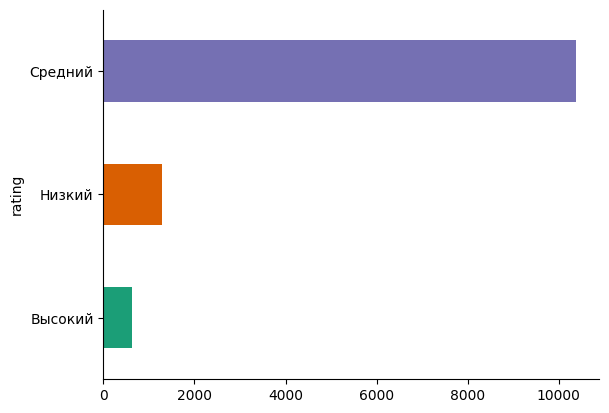

In [ ]:
# @title rating

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('rating').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   anime_id  12294 non-null  int64 
 1   episodes  12294 non-null  object
 2   rating    12294 non-null  object
 3   members   12294 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 384.3+ KB


In [ ]:
X=df.drop(columns=['rating'])
Y = df['rating']
X

,anime_id,episodes,members
0,32281,1,200630
1,5114,64,793665
2,28977,51,114262
3,9253,24,673572
4,9969,51,151266
...,...,...,...
12289,9316,1,211
12290,5543,1,183
12291,5621,4,219
12292,6133,1,175


**2.**


In [ ]:
#Делаем стандартизацию и лэйбл(он для статсмоделей)
scaler = MinMaxScaler()
le = LabelEncoder()
X[['anime_id']] = scaler.fit_transform(X[['anime_id']])
X['episodes'] = le.fit_transform(X['episodes'])
X['members'] = le.fit_transform(X['members'])
Y=le.fit_transform(Y)

In [ ]:
#Выводим коэф параметров регрессии

X = sm.add_constant(X)
mod = sm.OLS(Y.astype(float),X.astype(float))
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     315.2
Date:                Wed, 20 Mar 2024   Prob (F-statistic):          3.56e-197
Time:                        02:53:55   Log-Likelihood:                -8854.4
No. Observations:               12294   AIC:                         1.772e+04
Df Residuals:                   12290   BIC:                         1.775e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0516      0.010    199.821      0.000       2.031       2.072
anime_id      -0.3867      0.014    -27.522      0.000      -0.414      -0.359
episodes      -0.0001    8.1e-05     -1.666      0.096      -0.000    2.39e-05
members    -4.547e-05   2.25e-06    -20.245      0.000   -4.99e-05   -4.11e-05
==============================================================================
Omnibus:                     5222.998   Durbin-Watson:                   0.563
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19481.834
Skew:                          -2.189   Prob(JB):                         0.00
Kurtosis:                       7.344   Cond. No.                     1.06e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**3.**



In [ ]:
clf_final = LogisticRegression(penalty='l2',C=0.1,solver='lbfgs',max_iter=10000)

**4.**

In [ ]:
model_lr = LogisticRegression()
model_rfc = RandomForestClassifier()
model_knn = KNeighborsClassifier(n_neighbors=10)

In [ ]:
X=df.drop(columns=['rating'])
Y = df['rating']
Y=le.fit_transform(Y)
X[['members']] = scaler.fit_transform(X[['members']])
X=pd.get_dummies (X, columns=['episodes','anime_id'])

In [ ]:
X

,members,episodes_1,episodes_10,episodes_100,episodes_1006,episodes_101,episodes_102,episodes_103,episodes_104,episodes_105,...,anime_id_34498,anime_id_34501,anime_id_34502,anime_id_34503,anime_id_34506,anime_id_34514,anime_id_34519,anime_id_34522,anime_id_34525,anime_id_34527
0,0.197872,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.782770,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.112689,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.664325,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.149186,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,0.000203,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12290,0.000176,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12291,0.000211,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12292,0.000168,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

**5.**

In [ ]:
#Обучаем
model_lr=model_lr.fit(X_train,y_train)
model_rfc=model_rfc.fit(X_train,y_train)
model_knn=model_knn.fit(X_train,y_train)
y_pred_lr = model_lr.predict(X_test)
y_pred_rfc = model_rfc.predict(X_test)
y_pred_knn = model_knn.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Точность
ac_lr=accuracy_score(y_test,y_pred_lr)
ac_rfc=accuracy_score(y_test,y_pred_rfc)
ac_knn=accuracy_score(y_test,y_pred_knn)
ac_lr,ac_rfc,ac_knn


(0.8500948766603416, 0.8495527243155326, 0.8330170777988615)

In [ ]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.90      0.09      0.17       196
           1       0.57      0.17      0.26       391
           2       0.86      0.98      0.92      3102

    accuracy                           0.85      3689
   macro avg       0.78      0.41      0.45      3689
weighted avg       0.83      0.85      0.81      3689



In [ ]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.74      0.07      0.13       196
           1       0.64      0.13      0.21       391
           2       0.85      0.99      0.92      3102

    accuracy                           0.85      3689
   macro avg       0.74      0.40      0.42      3689
weighted avg       0.83      0.85      0.80      3689



In [ ]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.47      0.14      0.22       196
           1       0.43      0.23      0.30       391
           2       0.86      0.95      0.91      3102

    accuracy                           0.83      3689
   macro avg       0.59      0.44      0.47      3689
weighted avg       0.80      0.83      0.81      3689



Логистическая модель лучшая

**6.**

In [ ]:
cf_matrix = confusion_matrix(y_test,y_pred_lr)

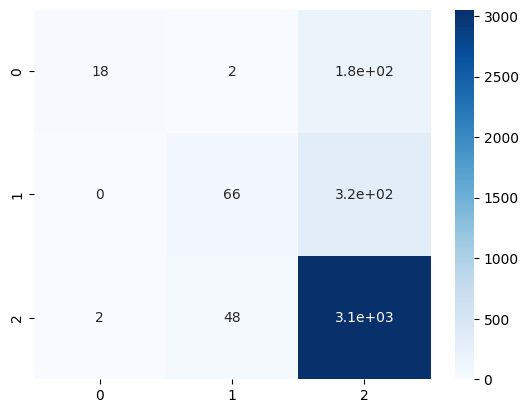

In [ ]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

In [ ]:
cf_matrix

array([[  18,    2,  176],
       [   0,   66,  325],
       [   2,   48, 3052]])

**7.**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_cla = DecisionTreeClassifier(max_depth = 5)
tree_cla= tree_cla.fit(X_train,y_train)
y_pred_tree=tree_cla.predict(X_test)

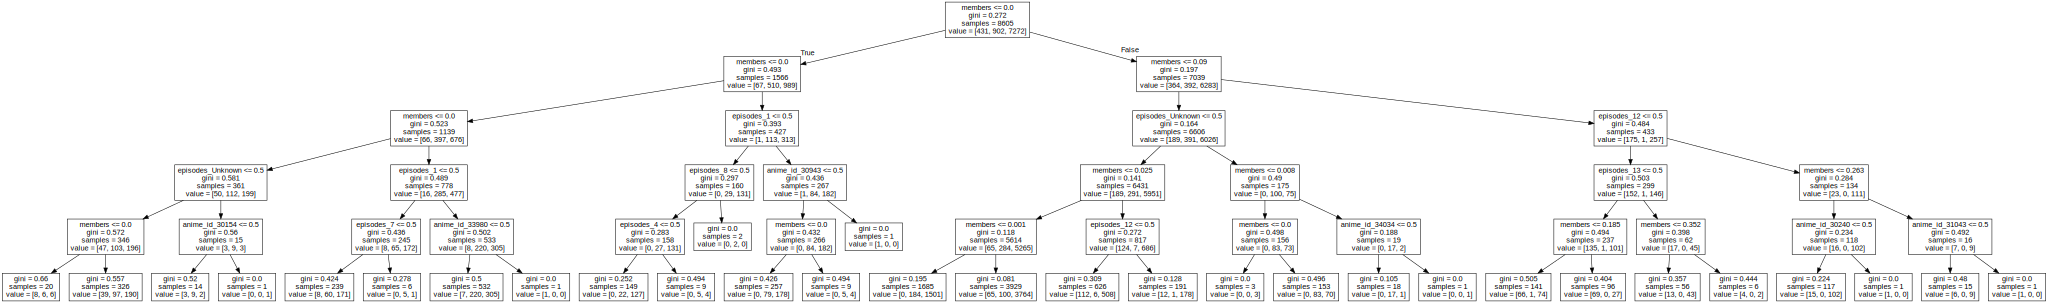

In [ ]:
from graphviz import Source
from sklearn import tree
Source( tree.export_graphviz(tree_cla, out_file=None, feature_names=X.columns))

**Доп баллы**

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
X_pca=pca.fit_transform(X)

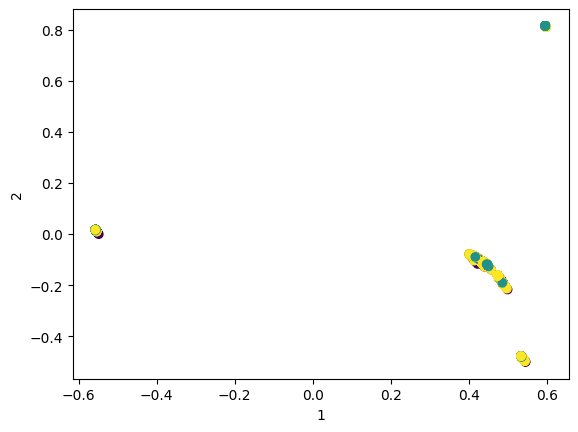

In [ ]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y, cmap='viridis')
plt.xlabel("1")
plt.ylabel("2")
plt.show()